In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("uber_new.csv")

df.shape

(1999, 9)

In [3]:
df.head()
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
df=df.drop(['Unnamed: 0','key'],axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        1999 non-null   float64
 1   pickup_datetime    1999 non-null   object 
 2   pickup_longitude   1999 non-null   float64
 3   pickup_latitude    1999 non-null   float64
 4   dropoff_longitude  1999 non-null   float64
 5   dropoff_latitude   1999 non-null   float64
 6   passenger_count    1999 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.4+ KB


In [6]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace=True)

In [8]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
def harversine(long1,long2,lat1,lat2):
    long1,long2,lat1,lat2=map(np.radians,[long1,long2,lat1,lat2])
    diff_long=long2-long1
    diff_lat=lat2-lat1
    km=2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +np.cos(lat1)*np.cos(lat2)*np.sin(diff_long/2.0)**2))
    return km

In [10]:

df['Distance']=harversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])


In [11]:
df['Distance']=df['Distance'].astype(float).round(2)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


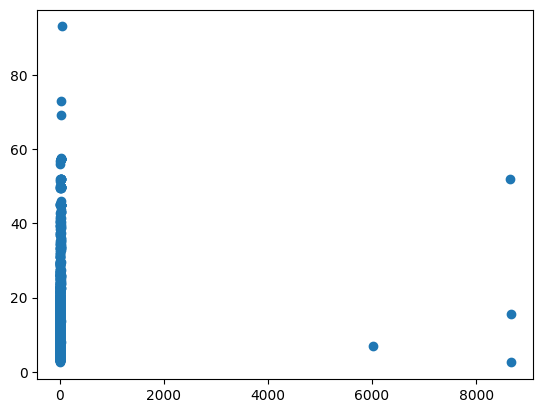

In [12]:
plt.scatter(df['Distance'],df['fare_amount'])

In [13]:
df.drop(df[df['Distance']>60].index,inplace=True)
df.drop(df[df['Distance']==0].index,inplace=True)
df.drop(df[df['fare_amount']==0].index,inplace=True)
df.drop(df[df['fare_amount']<0].index,inplace=True)
df.shape

(1935, 8)

In [14]:
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index,inplace=True)
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index,inplace=True)

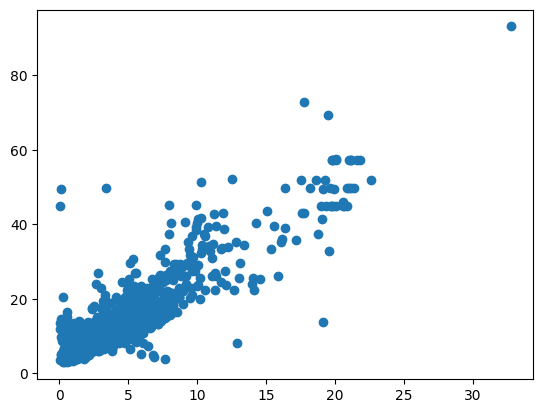

In [15]:
plt.scatter(df['Distance'],df['fare_amount'])

In [16]:
df=pd.DataFrame().assign(fare=df['fare_amount'],distance=df['Distance'])
df.head()

,fare,distance
0,7.5,1.68
1,7.7,2.46
2,12.9,5.04
3,5.3,1.66
4,16.0,4.48


In [17]:
x=df['distance']
y=df['fare']

In [18]:
X=df['distance'].values.reshape(-1,1)
Y=df['fare'].values.reshape(-1,1)

In [19]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
y_std=std.fit_transform(Y)
x_std=std.fit_transform(X)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_std,y_std,test_size=0.9,random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
l_reg.fit(X_train,Y_train)

LinearRegression()

In [22]:

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")
s1=input(print("Enter pickup Location: "))
s2=input(print("Enter dropoff Location: "))
location_pickup = geolocator.geocode(s1)
location_dropoff = geolocator.geocode(s2)

location_pickup_lat=location_pickup.latitude
location_pickup_long=location_pickup.longitude
location_dropoff_long=location_dropoff.longitude
location_dropoff_lat=location_dropoff.latitude
print(location_dropoff_lat)
print(location_dropoff_long)
print(location_pickup_lat)
print(location_pickup_long)

Enter pickup Location: 
Enter dropoff Location: 


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Charbagh&format=json&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002E3EAF1BA10>: Failed to establish a new connection: [WinError 10051] A socket operation was attempted to an unreachable network'))

In [ ]:
y_pred=l_reg.predict([[harversine(location_pickup_long,location_dropoff_long,location_pickup_lat,location_dropoff_lat)]])
y=y_pred*(83.14)

y/4


array([[210.19809789]])

In [ ]:
import random
a=random.randint(int(y/4),300)
print(a)

278


In [ ]:
from sklearn.metrics import r2_score

y_pred=l_reg.predict(X_test)

r_squared = r2_score(Y_test, y_pred)
percentage_correct = r_squared * 100
print("Percentage of correct predictions:", percentage_correct, "%")


Percentage of correct predictions: 81.23850087068915 %


In [ ]:
import pickle as pk
pickle_out=open("uber.pkl","wb")
pk.dump(l_reg,pickle_out)
pickle_out.close()